In [22]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20.0, 16.0)

from datetime import datetime
%matplotlib inline

In [20]:
data = gpd.read_file('../data/18septiembre/18septiembre.shp')
data.fecha = data.fecha.map(lambda x: datetime.strptime(x.split('.')[0], '%Y-%m-%d %H:%M:%S'))
data = data.loc[data.fecha.map(lambda x:x.day==20),
                ['BARRIO','COMUNA','NRO_EST','bicisDispo','posiciones','totales','fecha','geometry']]
data['fechaCorta']=[i.strftime('%H:%M') for i in data.fecha]
data.posiciones.replace(0.,1.,inplace=True)
data.head()

,BARRIO,COMUNA,NRO_EST,bicisDispo,posiciones,totales,fecha,geometry,fechaCorta
4,RECOLETA,2.0,01,2.0,16.0,16.0,2017-09-20 00:07:54,POINT (-58.39185516097447 -34.58358035902182),00:07
5,RECOLETA,2.0,01,2.0,16.0,16.0,2017-09-20 00:23:51,POINT (-58.39185516097447 -34.58358035902182),00:23
6,RECOLETA,2.0,01,2.0,16.0,16.0,2017-09-20 00:39:39,POINT (-58.39185516097447 -34.58358035902182),00:39
7,RECOLETA,2.0,01,3.0,15.0,16.0,2017-09-20 00:55:29,POINT (-58.39185516097447 -34.58358035902182),00:55
8,RECOLETA,2.0,01,3.0,15.0,16.0,2017-09-20 01:11:16,POINT (-58.39185516097447 -34.58358035902182),01:11


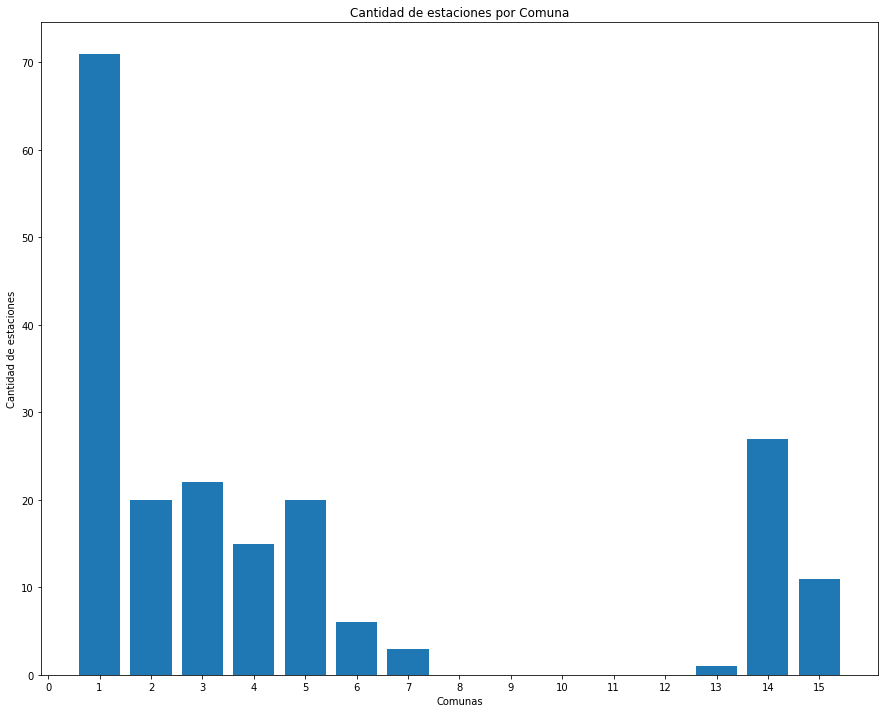

In [35]:
estaciones = data.loc[:,['BARRIO','COMUNA','NRO_EST']].drop_duplicates()
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(1,1,1)
ax.bar(estaciones.groupby(by='COMUNA').count()['NRO_EST'].index,estaciones.groupby(by='COMUNA').count()['NRO_EST'])
ax.set_xlabel('Comunas')
ax.set_ylabel('Cantidad de estaciones')
ax.set_xticks(range(16))
ax.set_xticklabels(range(16))
ax.set_title('Cantidad de estaciones por Comuna')

fig.savefig('../img/estacionesPorComuna.png')

In [121]:
estaciones.groupby(by='COMUNA').count()['NRO_EST'].sort_values()

COMUNA
13.0     1
7.0      3
6.0      6
15.0    11
4.0     15
2.0     20
5.0     20
3.0     22
14.0    27
1.0     71
Name: NRO_EST, dtype: int64

In [122]:
labels =['Comuna ' + str(int(i)) for i in estaciones.groupby(by='COMUNA').count()['NRO_EST'].sort_values().index]

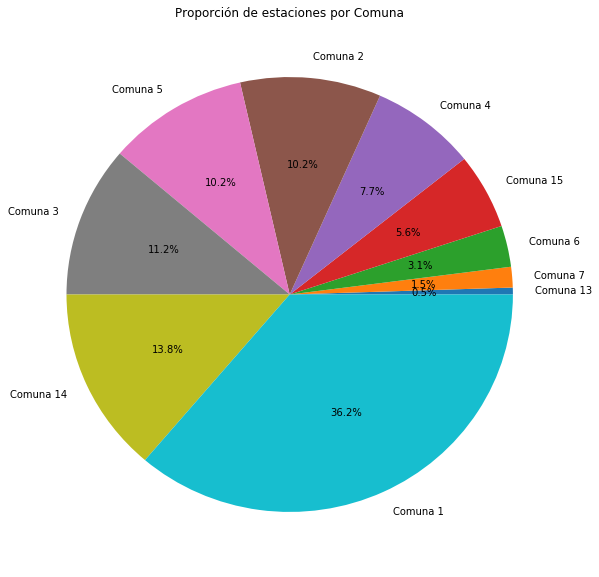

In [125]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.pie(estaciones.groupby(by='COMUNA').count()['NRO_EST'].sort_values(),  
       labels=labels,
                autopct='%1.1f%%')
ax.set_title(u'Proporción de estaciones por Comuna')

fig.savefig('../img/estacionesPorComunatorta.png')

In [141]:
(estaciones.groupby(by='COMUNA').count()['NRO_EST']*1./estaciones.groupby(by='COMUNA').count()['NRO_EST'].sum()).sort_values()[4:].sum()

0.8928571428571429

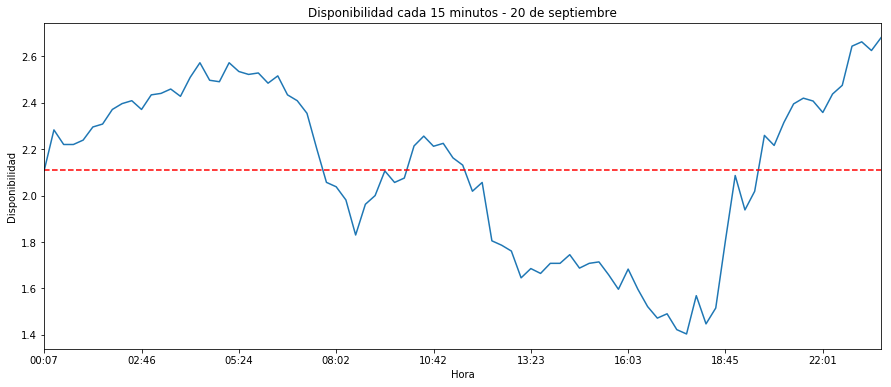

In [93]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,1,1)
ax2 = fig.add_subplot(1,1,1)

ax = data.groupby(by='fechaCorta').mean()['bicisDispo'].plot()
ax2 = plt.axhline(y=data.bicisDispo.describe()['mean'], color='r', linestyle='--')
ax.set_xlabel('Hora')
ax.set_ylabel('Disponibilidad')
ax.set_title('Disponibilidad cada 15 minutos - 20 de septiembre')
fig.savefig('../img/disponibilidadSerieTiempo.png')

/home/pipe/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [100]:
data.disponibilidad.describe()

count    13909.000000
mean        11.774740
std         20.475832
min          0.000000
25%          0.000000
50%          5.000000
75%         14.285714
max        100.000000
Name: disponibilidad, dtype: float64

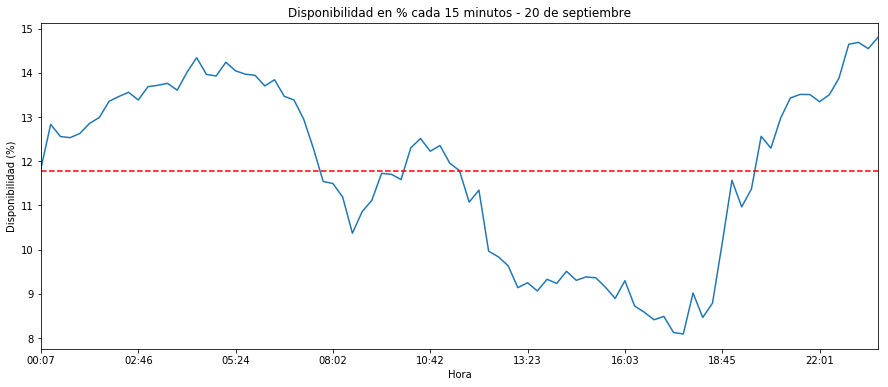

In [101]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,1,1)
ax2 = fig.add_subplot(1,1,1)

ax = data.groupby(by='fechaCorta').mean()['disponibilidad'].plot()
ax2 = plt.axhline(y=data.disponibilidad.describe()['mean'], color='r', linestyle='--')
ax.set_xlabel('Hora')
ax.set_ylabel('Disponibilidad (%)')
ax.set_title('Disponibilidad en % cada 15 minutos - 20 de septiembre')
fig.savefig('../img/disponibilidadPorcentajeSerieTiempo.png')

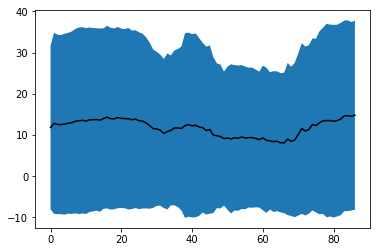

In [102]:
dataPlot = data.groupby(by='fechaCorta')['disponibilidad'].mean()
x = range(len(dataPlot))
dataPlotStd = data.groupby(by='fechaCorta')['disponibilidad'].std()

plt.plot(x, dataPlot, 'k-')
plt.fill_between(x, dataPlot-dataPlotStd, dataPlot+dataPlotStd)


In [169]:
data.groupby(by='fechaCorta')['disponibilidad'].mean()

fechaCorta
00:07    11.837587
00:23    12.834239
00:39    12.559114
00:55    12.533408
01:11    12.629245
01:27    12.856858
01:43    12.990506
01:58    13.356384
02:14    13.464293
02:30    13.559755
02:46    13.386425
03:01    13.687538
03:17    13.717487
03:33    13.763534
03:49    13.608048
04:05    14.010115
04:21    14.342924
04:37    13.965566
04:53    13.929128
05:08    14.240224
05:24    14.045023
05:40    13.970150
05:56    13.943695
06:12    13.703936
06:27    13.844073
06:43    13.469335
06:59    13.385593
07:15    12.950077
07:31    12.284247
07:46    11.541455
           ...    
15:15     9.363309
15:31     9.148907
15:48     8.894817
16:03     9.295988
16:19     8.724140
16:35     8.580808
16:52     8.412095
17:07     8.488749
17:23     8.123038
17:39     8.090594
17:55     9.017557
18:11     8.464127
18:28     8.789105
18:45    10.148073
19:01    11.568904
19:20    10.967052
19:40    11.371072
20:00    12.563933
20:21    12.295986
20:41    12.975365
21:02    13.430580
2

In [179]:
dataMadrugada = data.loc[data.fechaCorta == '05:08',:]
dataMadrugada.head()

,BARRIO,COMUNA,NRO_EST,bicisDispo,posiciones,totales,fecha,geometry,fechaCorta,disponibilidad
23,RECOLETA,2.0,01,3.0,15.0,16.0,2017-09-20 05:08:58,POINT (-58.39185516097447 -34.58358035902182),05:08,18.750000
114,RECOLETA,2.0,02,10.0,10.0,20.0,2017-09-20 05:08:58,POINT (-58.38835201253796 -34.59362431631472),05:08,50.000000
205,RECOLETA,2.0,03,0.0,13.0,19.0,2017-09-20 05:08:58,POINT (-58.39792420209378 -34.59963679494706),05:08,0.000000
296,RECOLETA,2.0,04,0.0,17.0,20.0,2017-09-20 05:08:58,POINT (-58.39706093932647 -34.58877062516784),05:08,0.000000
387,RECOLETA,2.0,06,2.0,26.0,28.0,2017-09-20 05:08:58,POINT (-58.39678121978938 -34.59084075285062),05:08,7.142857


{'boxes': [<matplotlib.lines.Line2D at 0x7f0dd6adb6d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0dd690d610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0dd68db910>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0dd68db2d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0dd6adb890>,
  <matplotlib.lines.Line2D at 0x7f0dd6adbf90>]}

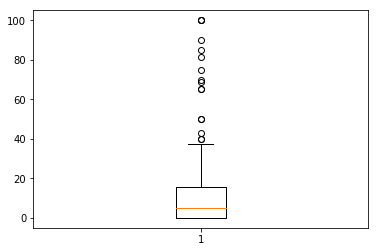

In [180]:
plt.boxplot([dataMadrugada.disponibilidad.dropna()])

In [181]:
dataMadrugada.disponibilidad = dataMadrugada.disponibilidad.fillna(200)
dataMadrugada.drop(['fecha'],axis=1).to_file('../data/estacionXcomunaMadurgada')


In [167]:
dataMadrugada.disponibilidad.describe()

count    159.000000
mean      14.240224
std       21.977551
min        0.000000
25%        0.000000
50%        5.000000
75%       15.394737
max      100.000000
Name: disponibilidad, dtype: float64

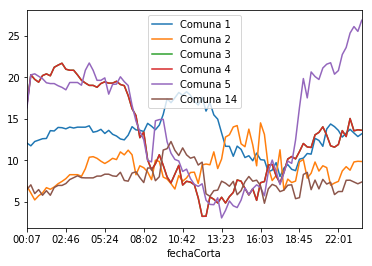

In [127]:
data[data.COMUNA==1].groupby(by='fechaCorta').mean()['disponibilidad'].plot(label='Comuna 1')
data[data.COMUNA==2].groupby(by='fechaCorta').mean()['disponibilidad'].plot(label='Comuna 2')
data[data.COMUNA==3].groupby(by='fechaCorta').mean()['disponibilidad'].plot(label='Comuna 3')
data[data.COMUNA==3].groupby(by='fechaCorta').mean()['disponibilidad'].plot(label='Comuna 4')
data[data.COMUNA==5].groupby(by='fechaCorta').mean()['disponibilidad'].plot(label='Comuna 5')
data[data.COMUNA==14].groupby(by='fechaCorta').mean()['disponibilidad'].plot(label='Comuna 14')
plt.legend()

In [14]:
data.fecha = data.fecha.map(str)

In [15]:
data.to_file('../data/20septiembre')

In [16]:
data.head()

,BARRIO,COMUNA,NRO_EST,bicisDispo,posiciones,totales,fecha,geometry,fechaCorta,disponibilidad
4,RECOLETA,2.0,01,2.0,16.0,16.0,2017-09-20 00:07:54,POINT (-58.39185516097447 -34.58358035902182),00:07,0.1250
5,RECOLETA,2.0,01,2.0,16.0,16.0,2017-09-20 00:23:51,POINT (-58.39185516097447 -34.58358035902182),00:23,0.1250
6,RECOLETA,2.0,01,2.0,16.0,16.0,2017-09-20 00:39:39,POINT (-58.39185516097447 -34.58358035902182),00:39,0.1250
7,RECOLETA,2.0,01,3.0,15.0,16.0,2017-09-20 00:55:29,POINT (-58.39185516097447 -34.58358035902182),00:55,0.1875
8,RECOLETA,2.0,01,3.0,15.0,16.0,2017-09-20 01:11:16,POINT (-58.39185516097447 -34.58358035902182),01:11,0.1875
